In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage.io import imread
from skimage.io import imsave
from skimage import feature
import scipy.ndimage

import cv2
from scipy import ndimage, misc
ascent = misc.ascent()

In [2]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(7,7))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd838ce8af0>)

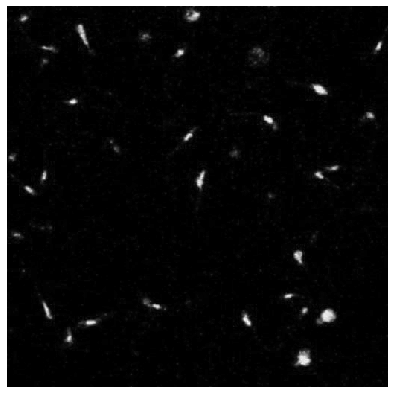

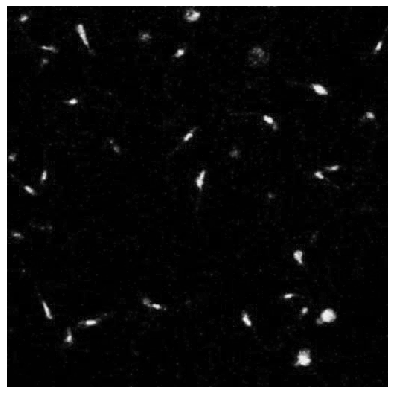

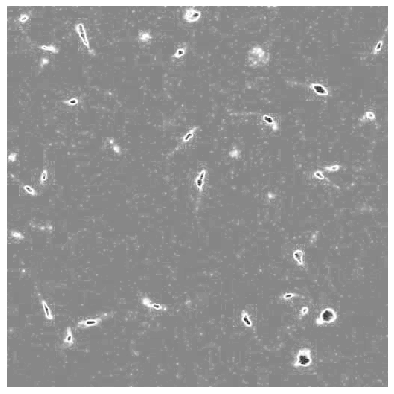

In [3]:
test_image = imread('images/sample.jpg')
test_image_bw = color.rgb2gray(test_image)
test_image_filtered = ndimage.gaussian_filter(test_image_bw, sigma = 3)
I = test_image_bw.copy()
e = 0.001
n = 0.5
I_techo = np.mean(test_image)
I_ones = np.ones(I.shape)
I = I_ones/(I_ones + I_techo/(I + I_ones*e)*n)

image_show(test_image_bw)

image_show(I)

image_show(I - test_image_bw)

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd8340dfca0>)

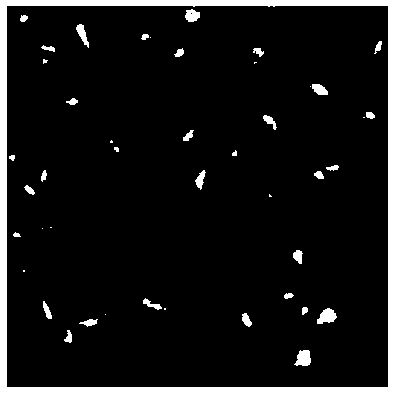

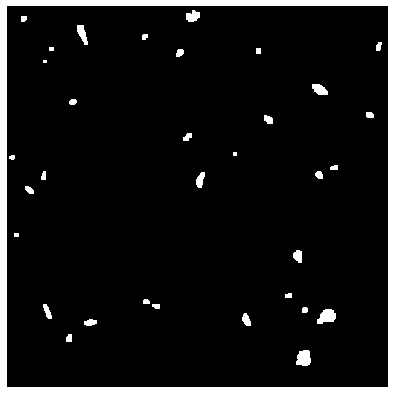

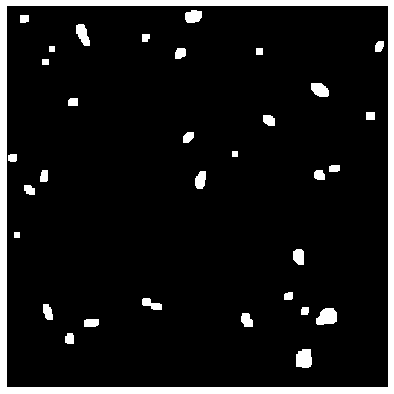

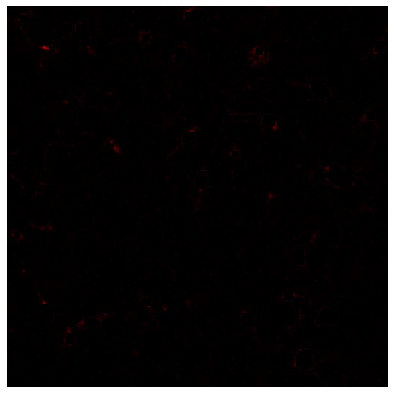

In [4]:
#test_image_bw_edges = feature.canny(test_image_bw, sigma=1)
test_image_threshold = filters.threshold_otsu(test_image_filtered) 
test_image_bw_segmented = np.uint8(test_image_bw > test_image_threshold)
image_show(test_image_bw_segmented)
img = cv2.morphologyEx(test_image_bw_segmented, cv2.MORPH_OPEN, np.ones((5,5),np.uint8))
image_show(img)
img = cv2.dilate(img, np.ones((4,4),np.uint8), iterations = 1)
test_image_bw_segmented = img
image_show(img)
mask = np.ones(test_image.shape)
mask[:,:,0], mask[:,:,1], mask[:,:,2] = test_image_bw_segmented*mask[:,:,0], test_image_bw_segmented*mask[:,:,1], test_image_bw_segmented*mask[:,:,2] 
image_show(test_image*(mask==0))

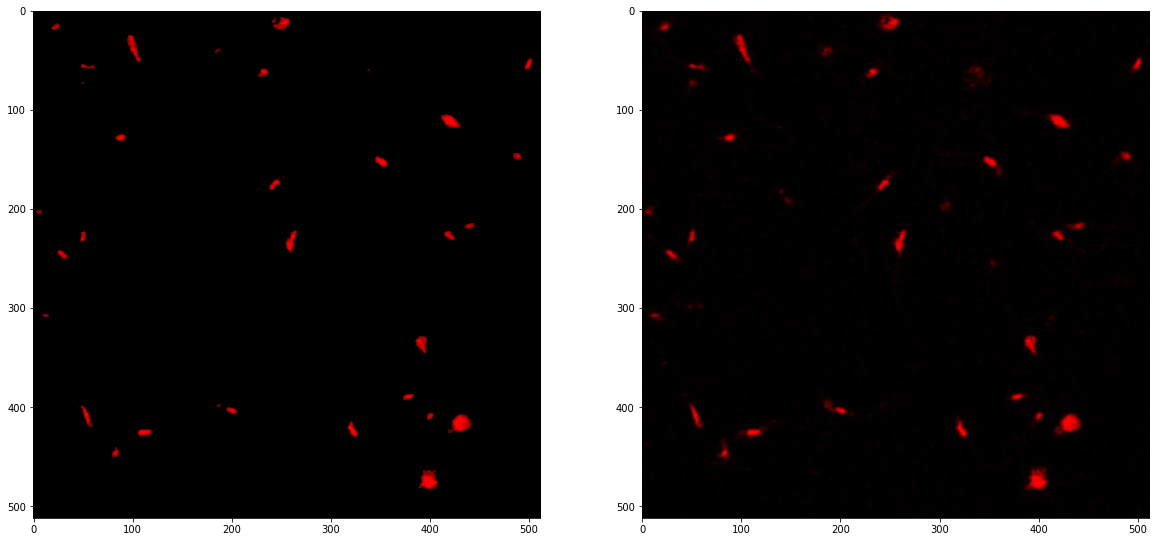

In [5]:
test_image_threshold = filters.threshold_otsu(test_image[:, :, 0]) 
mask = test_image[:, :, 0] > test_image_threshold
result_image = test_image.copy()
result_image[:,:,0], result_image[:,:,1], result_image[:,:,2] = mask*result_image[:,:,0], mask*result_image[:,:,1], mask*result_image[:,:,2]

plt.figure(figsize= (20,20))
plt.subplot(121)
plt.imshow(result_image)
plt.subplot(122)
plt.imshow(test_image)

In [ ]:
test_image = imread('images/sample.jpg')
|